<h1 style="font-size: 20pt">Python Notebook | Advanced | Pandas</h1><br/>

<b> Author: </b> Tamoghna Saha<br/> 
<b> Created: </b> Novemeber 2018<br/>

![Python](Photos/Python-programming.jpg)

# Table of Content:

* Pandas
    + Importing Data
    + Creating Test Object
    + Viewing Data
    + Data Cleaning
    + Selection
    + Filter, Sort & Group by
    + Iteration
    + Join, Merging
    + Statistics
    + Visualization
    + Exporting Data

# Pandas

Pandas is an open source data analysis library for providing easy-to-use data structures and data analysis tools.

__DataFrame__ is a mXn vector where
* m is the number of rows
* n is the number of columns

__Series__ is a mX1 vector. Hence, each column in DataFrame is known as a pandas series.

__NOTE__ 
* df - A pandas DataFrame object
* s - A pandas Series object

## Importing Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('google-play-store-apps/googleplaystore.csv') #read from csv
df[:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Other ways of importing data depending on the file type.

* __pd.read_table(filename)__ - From a delimited text file (like TSV)
* __pd.read_excel(filename)__ - From an Excel file 
* __pd.read_sql(query, connection_object)__ - Reads from a SQL table/database
* __pd.read_json(json_string)__ - Reads from a JSON file and extracts tables to a list of dataframes

## Create Test Objects
* __pd.DataFrame(dict)__ - From a dict, keys for columns names, values for data as lists
* __pd.DataFrame(np.random.rand(20,5))__ - 5 columns and 20 rows of random floats
* __pd.Series(my_list)__ - Creates a series from an iterable my_list

In [2]:
df_dict = pd.DataFrame(columns=['City','State'], data = [['Kolkata','West Bengal'], ['Bangalore','Karnataka']])
df_dict

,City,State
0,Kolkata,West Bengal
1,Bangalore,Karnataka


## Viewing Data

* __df.head(n)__ - First n rows of the DataFrame [__replace head with tail__, you know what you will get]
* __df.shape__ - Number of rows and columns 
* __df.info()__ - Index, Datatype and Memory 
* __df.describe()__ - Summary statistics for numerical columns
* __df.apply(pd.Series.value_counts)__ - Unique values and counts for all columns

__s.value_counts(dropna=False)__ - Views unique values and counts

In [3]:
print("df shape\n")
print(df.shape)
print("\n================")
print("df info\n")
df.info()

df shape

(10841, 13)

df info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Selection

* __df[col]__ or __df.col__- Returns column with label col as Series
* __df[[col1, col2]]__ - Returns Columns as a new DataFrame
* __s.iloc[0]__ - Selection by position/Integer-based indexing
* __s.loc[0]__ - Selection by index/label-based indexing
* __df.loc[:, :]__ and __df.iloc[:, :]__ - First argument represents the number of rows and the second for columns
* __df.ix[0:a, 0:b]__ - Arguments notation is same as above but returns a rows and (b-1) columns __[deprecated in Python 3]__

```
# Single selections using iloc and DataFrame
# Rows:
df.iloc[0] # first row of data frame
df.iloc[1] # second row of data frame
df.iloc[-1] # last row of data frame
# Columns:
df.iloc[:,0] # first column of data frame
df.iloc[:,1] # second column of data frame
df.iloc[:,-1] # last column of data frame
```

In [4]:
# rows 0 to 4; selective columns using iloc
df.iloc[0:4,[0,1]]

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN


In [5]:
# rows 0 to 4; all columns
df.loc[0:4,:] # : for columns is optional here since we are asking for all columns

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
# rows 0 to 4; selective columns
df.loc[0:4,['App','Category']]

,App,Category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN
1,Coloring book moana,ART_AND_DESIGN
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN
3,Sketch - Draw & Paint,ART_AND_DESIGN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN


__NOTE__: 
* In __loc__, we are mentioning the column names for selection, while in __iloc__ we are specifying the column number
* In __loc__, rows are getting printed including the upper bound, while in __iloc__, it is excluding it

Also __NOTE__ the following:
1. For creating a new DataFrame using column names
```
df[[col1, col2]]
```
is same as
```
df.loc[:,[col1, col2]]
```
2. For printing the first 5 rows of the DataFrame
```
df[0:n]
```
is same as
```
df.iloc[0:n, :]
```

## Data Cleaning


* __df.drop([col1, col2, col3], inplace = True, axis=1)__ - Remove set of column(s)
* __df.columns = ['a','b','c']__ - Renames columns
* __df.isnull()__ - Checks for null Values, Returns Boolean DataFrame
* __df.isnull().any()__ - Returns boolean value for each column, gives True if any null value detected corresponding to that column
* __df.dropna()__ - Drops all rows that contain null values
* __df.dropna(axis=1)__ - Drops all columns that contain null values
* __df.fillna(x)__ - Replaces all null values with x
* __s.replace(1,'one')__ - Replaces all values equal to 1 with 'one'
* __s.replace([1,3], ['one','three'])__ - Replaces all 1 with 'one' and 3 with 'three'
* __df.rename(columns = lambda x: x + '_1')__ - Mass renaming of columns
* __df.rename(columns = {'old_name': 'new_name'})__ - Selective renaming
* __df.rename(index = lambda x: x + 1)__ - Mass renaming of index
* __df[new_col] = df.col1 + ', ' + df.col2__ - Add two columns to create a new column in the same DataFrame

In [7]:
df.drop(['Category'], inplace=True, axis = 1)
df.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
df_any_null = df.isnull().any()
df_any_null

App               False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [9]:
df.dropna(axis=0, inplace=True)
df_check_null = df.isnull().any()
print(df.shape)
df_check_null

(9360, 12)


App               False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver       False
Android Ver       False
dtype: bool

In [10]:
df_new_cols_name = df.rename(columns = lambda x: (x.lower()).replace(' ','_'))
df_new_cols_name.head()

,app,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Filter, Sort & Group By
* __df[df[col] > 0.5]__ - Rows where the values in col > 0.5
* __df[(df[col] > 0.5) & (df[col] < 0.7)]__ - Rows where 0.7 > col > 0.5
* __df.sort_values(col1)__ - Sorts values by col1 in ascending order
* __df.sort_values(col2,ascending=False)__ - Sorts values by col2 in descending order
* __df.sort_values([col1,col2],ascending=[True,False])__ - Sorts values by col1 in ascending order then col2 in descending order

* __df.groupby(col)__ - Returns a groupby object for values from one column
* __df.groupby([col1,col2])__ - Returns a groupby object values from multiple columns
* __df.groupby(col1)[col2].mean()__ - (Aggregation) Returns the mean of the values in col2, grouped by the values in col1 
* __df.pivot_table(index=col1,values=[col2,col3],aggfunc=mean)__ - Creates a pivot table that groups by col1 and calculates the mean of col2 and col3
* __df.apply(np.mean)__ - Applies a function across each column
* __df.apply(np.max, axis=1)__ - Applies a function across each row
* __df.applymap(lambda arg(s): expression)__ - Apply the expression on each value of the DataFrame
* __df[col].map(lambda arg(s): expression)__ - Apply the expression on each value of the column col

In [11]:
df_high_rating = df[(df['Rating'] > 4) & (df['Rating'] < 4.7)]
print(df_high_rating.shape)
df_high_rating.head()

(5702, 12)


,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
7,Infinite Painter,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [12]:
print(df.groupby('Genres').size())

Genres
Action                                   358
Action;Action & Adventure                 17
Adventure                                 73
Adventure;Action & Adventure              13
Adventure;Brain Games                      1
Adventure;Education                        2
Arcade                                   207
Arcade;Action & Adventure                 15
Arcade;Pretend Play                        1
Art & Design                              55
Art & Design;Creativity                    7
Art & Design;Pretend Play                  2
Auto & Vehicles                           73
Beauty                                    42
Board                                     41
Board;Action & Adventure                   3
Board;Brain Games                         15
Board;Pretend Play                         1
Books & Reference                        178
Books & Reference;Education                2
Business                                 303
Card                                      45
Car

In [13]:
high_rating_g_by = df_high_rating.groupby(['Rating','Type']).size()
print(high_rating_g_by)

Rating  Type
4.1     Free     675
        Paid      32
4.2     Free     889
        Paid      62
4.3     Free    1025
        Paid      51
4.4     Free    1031
        Paid      77
4.5     Free     964
        Paid      73
4.6     Free     741
        Paid      82
dtype: int64


In [14]:
# store the grouped by table in a dataframe
df_group_by = pd.DataFrame({'count': high_rating_g_by}).reset_index()
df_group_by

,Rating,Type,count
0,4.1,Free,675
1,4.1,Paid,32
2,4.2,Free,889
3,4.2,Paid,62
4,4.3,Free,1025
5,4.3,Paid,51
6,4.4,Free,1031
7,4.4,Paid,77
8,4.5,Free,964
9,4.5,Paid,73


In [ ]:
# iterating through groupby

grouped = df_high_rating.groupby('Rating')

for name,group in grouped:
    if name >= 4.5: #only printing for rating 4.8 and 4.9
        print(name)
        print(group)
        print("="*50)

In [15]:
# aggregation

grouped = df.groupby('Genres')
print(grouped['Rating'].agg(np.mean))

Genres
Action                                   4.285475
Action;Action & Adventure                4.311765
Adventure                                4.180822
Adventure;Action & Adventure             4.423077
Adventure;Brain Games                    4.600000
Adventure;Education                      4.100000
Arcade                                   4.304348
Arcade;Action & Adventure                4.346667
Arcade;Pretend Play                      4.500000
Art & Design                             4.380000
Art & Design;Creativity                  4.400000
Art & Design;Pretend Play                3.900000
Auto & Vehicles                          4.190411
Beauty                                   4.278571
Board                                    4.292683
Board;Action & Adventure                 4.033333
Board;Brain Games                        4.340000
Board;Pretend Play                       4.800000
Books & Reference                        4.346067
Books & Reference;Education              4.

In [16]:
# applying multiple aggregation functions at once
print(grouped['Rating'].agg([np.sum, np.mean, np.std]))

                                          sum      mean       std
Genres                                                           
Action                                 1534.2  4.285475  0.291353
Action;Action & Adventure                73.3  4.311765  0.172780
Adventure                               305.2  4.180822  0.312542
Adventure;Action & Adventure             57.5  4.423077  0.148064
Adventure;Brain Games                     4.6  4.600000       NaN
Adventure;Education                       8.2  4.100000  0.000000
Arcade                                  891.0  4.304348  0.351323
Arcade;Action & Adventure                65.2  4.346667  0.306749
Arcade;Pretend Play                       4.5  4.500000       NaN
Art & Design                            240.9  4.380000  0.321685
Art & Design;Creativity                  30.8  4.400000  0.404145
Art & Design;Pretend Play                 7.8  3.900000  0.000000
Auto & Vehicles                         305.9  4.190411  0.543692
Beauty    

# Iteration

To iterate over the rows of the DataFrame, we can use the following functions:
* __df.iteritems()__ − to iterate over the (key,value) pairs
* __df.iterrows()__ − iterate over the rows as (index,series) pairs
* __df.itertuples()__ − this method will return an iterator yielding a named tuple for each row in the DataFrame. The __first element__ of the tuple will be the __row’s corresponding index value__, while the remaining values are the row values.

In [ ]:
iterated_df = pd.DataFrame(np.random.randn(4,3),columns=['col1','col2','col3'])
for key,value in iterated_df.iteritems():
    print(key)
    print(value)

In [ ]:
for row in iterated_df.itertuples():
    print(row)

# Operations with text data

String operations can be performed on Series in the format __s.str.op__ where __op__ can be:
1.	__swapcase__ - Swaps the case lower/upper.
2.	__lower() / upper()__ - Converts strings in the Series/Index to lower / upper case.
3.	__len()__ - Computes String length.
4.	__strip()__	- Helps strip whitespace(including newline) from each string in the Series/index from both the sides.
5.	__split(' ')__ - Splits each string with the given pattern.
6.	__cat(sep=' ')__ - Concatenates the series/index elements with given separator.
7.	__get_dummies()__ - Returns the DataFrame with One-Hot Encoded values.
8.	__contains(pattern)__ - Returns Boolean True for each element if the substring contains in the element, else False.
9.	__replace(a,b)__ - Replaces the value a with the value b.
10.	__repeat(value)__ - Repeats each element with specified number of times.
11.	__count(pattern)__ - Returns count of appearance of pattern in each element.
12.	__startswith(pattern) / endswith(pattern)__ - Returns true if the element in the Series/Index starts / ends with the pattern.
13.	__find(pattern)__ - Returns the first position of the first occurrence of the pattern. Returns -1 if not found.
14.	__findall(pattern)__ - Returns a list of all occurrence of the pattern.
15.	__islower() / isupper() / isnumeric()__ - Checks whether all characters in each string in the Series/Index in lower / upper case / numeric or not. Returns Boolean.

In [17]:
s = pd.Series(['Tom ', ' William Rick', 'John', 'Alber@t'])
print(s.str.contains(' '))

0     True
1     True
2    False
3    False
dtype: bool


## Joining, Merging

* __df1.append(df2)__ OR __pd.concat([df1, df2], axis=0)__ - Adds the rows in df1 to the end of df2 (columns should be identical)
* __pd.concat([df1, df2], axis=1)__ - Adds the columns in df1 to the end of df2 (rows should be identical)
* __pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)__ - where
    + left − A DataFrame object.
    + right − Another DataFrame object.
    + how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
    + on − Columns (names) to join on. __Must be found in both__ the left and right DataFrame objects.
    + left_on − Columns from the left DataFrame to use as keys.
    + right_on − Columns from the right DataFrame to use as keys.
    + left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
    + right_index − Same usage as left_index for the right DataFrame.
    + sort − Sort the result DataFrame by the join keys in _lexicographical order_. Defaults to True, setting to False will improve the performance substantially in many cases.

| Merge Method | SQL Equivalent	| Description |
|:-:|:-:|:-:|
|left	|LEFT OUTER JOIN	|Use keys from left object
|right	|RIGHT OUTER JOIN	|Use keys from right object
|outer	|FULL OUTER JOIN	|Use union of keys
|inner	|INNER JOIN	|Use intersection of keys

In [18]:
import pandas as pd
left = pd.DataFrame({
         'id':[1,2,3,4,5],
         'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayan'],
         'subject_id':['sub1','sub2','sub4','sub6','sub5']})

right = pd.DataFrame(
         {'id':[1,2,3,4,5],
         'Name': ['Billy', 'Brian', 'Brock', 'Bryce', 'Betty'],
         'subject_id':['sub2','sub4','sub3','sub6','sub5']})

In [19]:
print("MERGE by ROWS"+'\n')
print(pd.concat([left,right],ignore_index=True))
print('='*50)
print(left.append(right))
print('='*50)
print('\n'+"MERGE by COLUMNS"+'\n')
print(pd.concat([left,right],axis=1)) # merging by columns

MERGE by ROWS

   id   Name subject_id
0   1   Alex       sub1
1   2    Amy       sub2
2   3  Allen       sub4
3   4  Alice       sub6
4   5   Ayan       sub5
5   1  Billy       sub2
6   2  Brian       sub4
7   3  Brock       sub3
8   4  Bryce       sub6
9   5  Betty       sub5
   id   Name subject_id
0   1   Alex       sub1
1   2    Amy       sub2
2   3  Allen       sub4
3   4  Alice       sub6
4   5   Ayan       sub5
0   1  Billy       sub2
1   2  Brian       sub4
2   3  Brock       sub3
3   4  Bryce       sub6
4   5  Betty       sub5

MERGE by COLUMNS

   id   Name subject_id  id   Name subject_id
0   1   Alex       sub1   1  Billy       sub2
1   2    Amy       sub2   2  Brian       sub4
2   3  Allen       sub4   3  Brock       sub3
3   4  Alice       sub6   4  Bryce       sub6
4   5   Ayan       sub5   5  Betty       sub5


In [20]:
# merge two dataframes on a key
print(pd.merge(left,right,on='id'))
print('='*50)
# merge two dataframes on multiple keys
print(pd.merge(left,right,on=['id','subject_id']))

   id Name_x subject_id_x Name_y subject_id_y
0   1   Alex         sub1  Billy         sub2
1   2    Amy         sub2  Brian         sub4
2   3  Allen         sub4  Brock         sub3
3   4  Alice         sub6  Bryce         sub6
4   5   Ayan         sub5  Betty         sub5
   id Name_x subject_id Name_y
0   4  Alice       sub6  Bryce
1   5   Ayan       sub5  Betty


In [22]:
print(pd.merge(left, right, on='subject_id', how='left'))

   id_x Name_x subject_id  id_y Name_y
0     1   Alex       sub1   NaN    NaN
1     2    Amy       sub2   1.0  Billy
2     3  Allen       sub4   2.0  Brian
3     4  Alice       sub6   4.0  Bryce
4     5   Ayan       sub5   5.0  Betty


## Statistics

* __df.mean()__ - Returns the mean of all columns
* __df.corr()__ - Returns the correlation between columns in a DataFrame
* __df.count()__ - Returns the number of non-null values in each DataFrame column
* __df.max()__ - Returns the highest value in each column
* __df.min()__ - Returns the lowest value in each column
* __df.median()__ - Returns the median of each column
* __df.std()__ - Returns the standard deviation of each column

In [23]:
df['Rating'].mean()

4.191837606837606

## Visualization

The following charts we can generate straight from pandas:
* __bar__ or barh for bar plots
* __hist__ for histogram
* __area__ for area plots
* __scatter__ for scatter plots

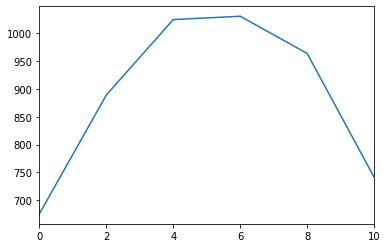

In [25]:
df_group_by[df_group_by['Type']=='Free']['count'].plot()

In [ ]:
df_bar = df_high_rating[['Rating','Reviews']][:10]
df_bar['Reviews'] = df_bar['Reviews'].astype(int)

df_bar.plot.bar(stacked = True)

In [ ]:
df_bar.plot.scatter(x='Rating', y='Reviews')

## Exporting the Data

* __df.to_csv(filename)__ - Writes to a CSV file
* __df.to_excel(filename)__ - Writes to an Excel file
* __df.to_sql(table_name, connection_object)__ - Writes to a SQL table
* __df.to_json(filename)__ - Writes to a file in JSON format
* __df.to_html(filename)__ - Saves as an HTML table

In [26]:
df_new_cols_name.to_csv('./google-play-store-apps/cleaned_googleplay_data.csv')